* Handling Columns
* Handling Rows
* Handling Duplicates
* Handling Missing Values
* Group by & Pivot table
* Merge & Joins
* Concat & append, Stacking
* Melt

In [1]:
import pandas as pd
import numpy as np
import random
import names

In [2]:
alldf = pd.read_excel("PropertyOrderProduct.xlsx", sheet_name = None) #reads all the sheets as dict
alldf.keys() #keys are the sheet name and values are the tables

dict_keys(['PropertyInfo', 'Products', 'OrderDetails'])

In [3]:
props = alldf['PropertyInfo'] 
prods = alldf['Products'] 
ords = alldf['OrderDetails'] 

In [4]:
# To read data from current path - xlsx, csv
sales2 = pd.read_csv(r"C:\Users\harshal gidh\Desktop\Python\Sales.csv")
sales2.shape

(5000, 11)

In [5]:
df = sales2.copy()

# Handling Columns

In [6]:
df.columns

Index(['OrderID', 'OrderDate', 'PropertyID', 'ProductID', 'Quantity',
       'ProductName', 'ProductCategory', 'Price', 'PropertyCity',
       'PropertyState', 'sales'],
      dtype='object')

In [7]:
df = df.rename(columns = {"ProductName" : "Product Name", "ProductCategory" : "Category", 
                     "PropertyCity": "City", "PropertyState" : "State", "sales" : "Sales"})

In [8]:
df.columns

Index(['OrderID', 'OrderDate', 'PropertyID', 'ProductID', 'Quantity',
       'Product Name', 'Category', 'Price', 'City', 'State', 'Sales'],
      dtype='object')

In [9]:
df1 = df.iloc[:5, :]
df1

,OrderID,OrderDate,PropertyID,ProductID,Quantity,Product Name,Category,Price,City,State,Sales
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85,Las Vegas,Nevada,85
1,163,NaN,17,41,2,Office Chair,Furnishings,85,Las Vegas,Nevada,170
2,1598,NaN,17,41,3,Office Chair,Furnishings,85,Las Vegas,Nevada,255
3,4155,NaN,17,41,2,Office Chair,Furnishings,85,Las Vegas,Nevada,170
4,1109,NaN,17,54,2,Chest of Drawers,Furnishings,150,Las Vegas,Nevada,300


In [10]:
newcols = list("ABCDEFGHIJK")
newcols

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']

In [11]:
df1.columns = newcols
df1

,A,B,C,D,E,F,G,H,I,J,K
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85,Las Vegas,Nevada,85
1,163,NaN,17,41,2,Office Chair,Furnishings,85,Las Vegas,Nevada,170
2,1598,NaN,17,41,3,Office Chair,Furnishings,85,Las Vegas,Nevada,255
3,4155,NaN,17,41,2,Office Chair,Furnishings,85,Las Vegas,Nevada,170
4,1109,NaN,17,54,2,Chest of Drawers,Furnishings,150,Las Vegas,Nevada,300


In [12]:
df.head(2)

,OrderID,OrderDate,PropertyID,ProductID,Quantity,Product Name,Category,Price,City,State,Sales
0,1,01-01-2015,17,41,1,Office Chair,Furnishings,85,Las Vegas,Nevada,85
1,163,NaN,17,41,2,Office Chair,Furnishings,85,Las Vegas,Nevada,170


# dropping cols

In [13]:
df1 = df1[["A", "C", "D", "E", "F"]]
df1

,A,C,D,E,F
0,1,17,41,1,Office Chair
1,163,17,41,2,Office Chair
2,1598,17,41,3,Office Chair
3,4155,17,41,2,Office Chair
4,1109,17,54,2,Chest of Drawers


In [14]:
df1.drop(columns = ['A', 'C'], inplace = True) # Permanentely makes the changes
df1

C:\Users\harshal gidh\AppData\Local\Temp\ipykernel_13268\2595327886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns = ['A', 'C'], inplace = True) # Permanentely makes the changes


,D,E,F
0,41,1,Office Chair
1,41,2,Office Chair
2,41,3,Office Chair
3,41,2,Office Chair
4,54,2,Chest of Drawers


In [15]:
df.drop(columns = ['OrderID', 'PropertyID', 'ProductID'], inplace = True)

In [16]:
df.head(2)

,OrderDate,Quantity,Product Name,Category,Price,City,State,Sales
0,01-01-2015,1,Office Chair,Furnishings,85,Las Vegas,Nevada,85
1,NaN,2,Office Chair,Furnishings,85,Las Vegas,Nevada,170


In [17]:
# Reordering Cols
df = df.iloc[:, [0,3,2,6,5,4,1,7]]
df.head()

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85
1,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170
2,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,3,255
3,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170
4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300


In [18]:
df = df[['OrderDate', 'Category', 'Product Name', 'State','City','Price','Quantity','Sales']]
df.head(2)

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85
1,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170


In [19]:
# Replace values inside a column
df1['F'] = df1['F'].replace("Office Chair", "Test data")
df1

C:\Users\harshal gidh\AppData\Local\Temp\ipykernel_13268\3434663195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['F'] = df1['F'].replace("Office Chair", "Test data")


,D,E,F
0,41,1,Test data
1,41,2,Test data
2,41,3,Test data
3,41,2,Test data
4,54,2,Chest of Drawers


In [20]:
# Replace values inside a column
df1['F'] = df1['F'].replace({"Test data": "Office Chair", "Chest of Drawers" : "Something"})
df1

C:\Users\harshal gidh\AppData\Local\Temp\ipykernel_13268\2818234691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['F'] = df1['F'].replace({"Test data": "Office Chair", "Chest of Drawers" : "Something"})


,D,E,F
0,41,1,Office Chair
1,41,2,Office Chair
2,41,3,Office Chair
3,41,2,Office Chair
4,54,2,Something


# Adding cols

In [21]:
df1 = df.iloc[:5, :]
df1

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85
1,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170
2,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,3,255
3,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170
4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300


# re module

In [22]:
df1['Product Name'] = np.where(df1['Sales'] > 150, 
                               df1['Product Name'].replace("Office Chair", "Something"), 
                               df1['Product Name'])
df1

C:\Users\harshal gidh\AppData\Local\Temp\ipykernel_13268\4061032108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Product Name'] = np.where(df1['Sales'] > 150,


,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85
1,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170
2,NaN,Furnishings,Something,Nevada,Las Vegas,85,3,255
3,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170
4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300


In [23]:
df.head(2)

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85
1,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170


In [24]:
df['Month No'] = pd.DatetimeIndex(df['OrderDate']).month
df['Year'] = pd.DatetimeIndex(df['OrderDate']).year
df['Month Name'] = pd.DatetimeIndex(df['OrderDate']).month_name()

C:\Users\harshal gidh\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '30-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\harshal gidh\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '23-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\harshal gidh\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '23-10-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\harshal gidh\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29-11-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [25]:
df.head()

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,Month No,Year,Month Name
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85,1.0,2015.0,January
1,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170,NaN,NaN,NaN
2,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,3,255,NaN,NaN,NaN
3,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170,NaN,NaN,NaN
4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300,NaN,NaN,NaN


In [26]:
df['Variance'] = df['Sales'] - df['Price']
df.head()

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,Month No,Year,Month Name,Variance
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85,1.0,2015.0,January,0
1,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170,NaN,NaN,NaN,85
2,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,3,255,NaN,NaN,NaN,170
3,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170,NaN,NaN,NaN,85
4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300,NaN,NaN,NaN,150


In [27]:
df1['New Column'] = None
df1

C:\Users\harshal gidh\AppData\Local\Temp\ipykernel_13268\1645231775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['New Column'] = None


,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,New Column
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85,None
1,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170,None
2,NaN,Furnishings,Something,Nevada,Las Vegas,85,3,255,None
3,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170,None
4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300,None


# Handling Rows

In [28]:
df.Sales.describe()

count    5000.000000
mean      106.695800
std       131.575007
min         3.000000
25%        27.000000
50%        60.000000
75%       120.000000
max       900.000000
Name: Sales, dtype: float64

In [29]:
remrows = df[df['Sales'] > 300].index
remrows

Int64Index([  14,   59,   60,   89,  137,  138,  139,  155,  193,  194,
            ...
            4899, 4920, 4936, 4964, 4975, 4983, 4985, 4986, 4987, 4988],
           dtype='int64', length=361)

In [30]:
df.drop(index = remrows, inplace = True)
df.shape

(4639, 12)

In [31]:
df.loc[58:61, :]

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,Month No,Year,Month Name,Variance
58,NaN,Maintenance,Door Lock,Nevada,Las Vegas,117,1,117,NaN,NaN,NaN,0
61,NaN,Furnishings,Ironing Board,Nevada,Las Vegas,18,3,54,NaN,NaN,NaN,36


In [32]:
# To reset index
df2 = df1.copy()
df2.reset_index()

,index,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,New Column
0,0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85,None
1,1,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170,None
2,2,NaN,Furnishings,Something,Nevada,Las Vegas,85,3,255,None
3,3,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170,None
4,4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300,None


In [33]:
df1.reset_index(drop = True) #eliminates old index and produces new index starting from 0

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,New Column
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85,None
1,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170,None
2,NaN,Furnishings,Something,Nevada,Las Vegas,85,3,255,None
3,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170,None
4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300,None


In [34]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', length=4639)

In [35]:
df = df.reset_index(drop = True)
df.index

RangeIndex(start=0, stop=4639, step=1)

In [36]:
df.head(2)

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,Month No,Year,Month Name,Variance
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85,1.0,2015.0,January,0
1,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170,NaN,NaN,NaN,85


# Handling Duplicates

In [37]:
df1

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,New Column
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85,None
1,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170,None
2,NaN,Furnishings,Something,Nevada,Las Vegas,85,3,255,None
3,NaN,Furnishings,Something,Nevada,Las Vegas,85,2,170,None
4,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300,None


In [38]:
df[df.duplicated()] #boolean function

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,Month No,Year,Month Name,Variance
3,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170,NaN,NaN,NaN,85
5,NaN,Furnishings,Chest of Drawers,Nevada,Las Vegas,150,2,300,NaN,NaN,NaN,150
55,NaN,Maintenance,Door Lock,Nevada,Las Vegas,117,1,117,NaN,NaN,NaN,0
57,NaN,Maintenance,Door Lock,Nevada,Las Vegas,117,1,117,NaN,NaN,NaN,0
60,NaN,Furnishings,Ironing Board,Nevada,Las Vegas,18,2,36,NaN,NaN,NaN,18
1297,21-02-2015,Housekeeping,Bath Soap,Washington,Seattle,35,2,70,2.0,2015.0,February,35
3319,20-08-2016,Furnishings,Floor Lamp,California,San Francisco,55,3,165,8.0,2016.0,August,110
3655,28-02-2015,Office Supplies,Paper Clips,Pennsylvania,Philadelphia,3,3,9,2.0,2015.0,February,6


In [39]:
df.duplicated().sum() # total no of duplicated rows

8

In [40]:
# Eliminate duplicates
df.drop_duplicates(inplace = True)

In [41]:
df[df.duplicated()]

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,Month No,Year,Month Name,Variance


In [42]:
dups = pd.read_excel('Duplicates.xlsx')
dups = dups.sort_values(by = "Name")
dups 

,Name,Age,Sal
0,A,38,33
1,B,60,40
2,B,60,40
3,B,60,40
4,E,28,57
5,F,38,73
6,F,38,73
7,H,44,66
8,I,29,26
9,I,72,15


In [43]:
dups[dups.duplicated()]

,Name,Age,Sal
2,B,60,40
3,B,60,40
6,F,38,73


In [44]:
dups.duplicated().sum()

3

In [45]:
dups

,Name,Age,Sal
0,A,38,33
1,B,60,40
2,B,60,40
3,B,60,40
4,E,28,57
5,F,38,73
6,F,38,73
7,H,44,66
8,I,29,26
9,I,72,15


In [46]:
dups[~dups['Name'].duplicated()]

,Name,Age,Sal
0,A,38,33
1,B,60,40
4,E,28,57
5,F,38,73
7,H,44,66
8,I,29,26


In [47]:
dups

,Name,Age,Sal
0,A,38,33
1,B,60,40
2,B,60,40
3,B,60,40
4,E,28,57
5,F,38,73
6,F,38,73
7,H,44,66
8,I,29,26
9,I,72,15


In [48]:
dups = dups.drop_duplicates(subset = "Name")
dups

,Name,Age,Sal
0,A,38,33
1,B,60,40
4,E,28,57
5,F,38,73
7,H,44,66
8,I,29,26


In [49]:
dups = dups.reset_index(drop = True)
dups

,Name,Age,Sal
0,A,38,33
1,B,60,40
2,E,28,57
3,F,38,73
4,H,44,66
5,I,29,26


* Handling Missing Values
* Group by & Pivot table
* Merge & Joins
* Concat & append, Stacking
* Melt

# Handling Missing Values

In [55]:
nulls = pd.read_excel("Duplicates.xlsx", sheet_name = "Sheet2")
nulls

,Name,Age,Temp,Sal
0,A,38.0,NaN,33.0
1,B,60.0,NaN,40.0
2,B,60.0,NaN,40.0
3,B,60.0,NaN,NaN
4,E,28.0,NaN,57.0
5,F,38.0,NaN,73.0
6,NaN,NaN,NaN,NaN
7,H,44.0,NaN,66.0
8,NaN,29.0,NaN,26.0
9,I,72.0,NaN,15.0


# NaN == nan, NaT, None

In [56]:
# Total number of nulls in every col
nulls.isnull().sum()

Name     2
Age      1
Temp    10
Sal      2
dtype: int64

In [57]:
nulls.isnull().sum().sum() #total number of nulls in the entire table

15

In [58]:
nulls[nulls['Name'].isna()]

,Name,Age,Temp,Sal
6,NaN,NaN,NaN,NaN
8,NaN,29.0,NaN,26.0


In [59]:
nulls[nulls['Sal'].isna()]

,Name,Age,Temp,Sal
3,B,60.0,NaN,NaN
6,NaN,NaN,NaN,NaN


# Drop nulls

In [60]:
nulls

,Name,Age,Temp,Sal
0,A,38.0,NaN,33.0
1,B,60.0,NaN,40.0
2,B,60.0,NaN,40.0
3,B,60.0,NaN,NaN
4,E,28.0,NaN,57.0
5,F,38.0,NaN,73.0
6,NaN,NaN,NaN,NaN
7,H,44.0,NaN,66.0
8,NaN,29.0,NaN,26.0
9,I,72.0,NaN,15.0


In [61]:
nulls.dropna()

,Name,Age,Temp,Sal


In [62]:
nulls.dropna(axis = 0, how = "any") # axis = 0 means row, how will be "ANY"

,Name,Age,Temp,Sal


In [63]:
nulls.dropna(axis = 0, how = "all") # axis = 0 means row, how will be "ALL"

,Name,Age,Temp,Sal
0,A,38.0,NaN,33.0
1,B,60.0,NaN,40.0
2,B,60.0,NaN,40.0
3,B,60.0,NaN,NaN
4,E,28.0,NaN,57.0
5,F,38.0,NaN,73.0
7,H,44.0,NaN,66.0
8,NaN,29.0,NaN,26.0
9,I,72.0,NaN,15.0


In [64]:
nulls.dropna(axis = 1, how = "any") # axis = 1 means col, how will be "ALL"

""
0
1
2
3
4
5
6
7
8
9


In [65]:
nulls.dropna(axis = 1, how = "all") # axis = 1 means col, how will be "ALL"

,Name,Age,Sal
0,A,38.0,33.0
1,B,60.0,40.0
2,B,60.0,40.0
3,B,60.0,NaN
4,E,28.0,57.0
5,F,38.0,73.0
6,NaN,NaN,NaN
7,H,44.0,66.0
8,NaN,29.0,26.0
9,I,72.0,15.0


# Filling/replacing nulls

In [66]:
nulls

,Name,Age,Temp,Sal
0,A,38.0,NaN,33.0
1,B,60.0,NaN,40.0
2,B,60.0,NaN,40.0
3,B,60.0,NaN,NaN
4,E,28.0,NaN,57.0
5,F,38.0,NaN,73.0
6,NaN,NaN,NaN,NaN
7,H,44.0,NaN,66.0
8,NaN,29.0,NaN,26.0
9,I,72.0,NaN,15.0


In [67]:
nulls.fillna("Dummy")

,Name,Age,Temp,Sal
0,A,38.0,Dummy,33.0
1,B,60.0,Dummy,40.0
2,B,60.0,Dummy,40.0
3,B,60.0,Dummy,Dummy
4,E,28.0,Dummy,57.0
5,F,38.0,Dummy,73.0
6,Dummy,Dummy,Dummy,Dummy
7,H,44.0,Dummy,66.0
8,Dummy,29.0,Dummy,26.0
9,I,72.0,Dummy,15.0


In [68]:
nulls['Name'].mode()[0] #most freq occuring value

'B'

In [69]:
nulls['Name'].fillna(nulls['Name'].mode()[0])

0    A
1    B
2    B
3    B
4    E
5    F
6    B
7    H
8    B
9    I
Name: Name, dtype: object

In [70]:
nulls['Age'].mean()

47.666666666666664

In [71]:
nulls['Age'].fillna(round(nulls['Age'].mean(),2))

0    38.00
1    60.00
2    60.00
3    60.00
4    28.00
5    38.00
6    47.67
7    44.00
8    29.00
9    72.00
Name: Age, dtype: float64

# Group by & Pivot table

In [72]:
df.columns

Index(['OrderDate', 'Category', 'Product Name', 'State', 'City', 'Price',
       'Quantity', 'Sales', 'Month No', 'Year', 'Month Name', 'Variance'],
      dtype='object')

In [73]:
df.head(2)

,OrderDate,Category,Product Name,State,City,Price,Quantity,Sales,Month No,Year,Month Name,Variance
0,01-01-2015,Furnishings,Office Chair,Nevada,Las Vegas,85,1,85,1.0,2015.0,January,0
1,NaN,Furnishings,Office Chair,Nevada,Las Vegas,85,2,170,NaN,NaN,NaN,85


In [74]:
df.shape

(4631, 12)

In [75]:
df.Year.unique()

array([2015.,   nan, 2016.])

In [76]:
df.groupby("Month Name")['Sales'].sum()

Month Name
April        30228
August       31774
December     26392
February     29719
January      29654
July         29898
June         27546
March        30921
May          33225
November     31695
October      31554
September    23506
Name: Sales, dtype: int64

In [77]:
df.groupby("Month Name")['Sales'].mean()

Month Name
April        77.507692
August       75.115839
December     74.977273
February     78.830239
January      74.507538
July         76.465473
June         69.913706
March        77.302500
May          84.757653
November     82.971204
October      79.481108
September    72.549383
Name: Sales, dtype: float64

In [78]:
df.groupby(["Year", "Month Name"])['Sales'].sum()

Year    Month Name
2015.0  April         13835
        August        16011
        December      13516
        February      14390
        January       14523
        July          14768
        June          14340
        March         16129
        May           16305
        November      19205
        October       16433
        September     12460
2016.0  April         16393
        August        15763
        December      12876
        February      15329
        January       15131
        July          15130
        June          13206
        March         14792
        May           16920
        November      12490
        October       15121
        September     11046
Name: Sales, dtype: int64

In [79]:
df.groupby(["Year", "Month Name"], as_index = False)['Sales'].sum()

,Year,Month Name,Sales
0,2015.0,April,13835
1,2015.0,August,16011
2,2015.0,December,13516
3,2015.0,February,14390
4,2015.0,January,14523
5,2015.0,July,14768
6,2015.0,June,14340
7,2015.0,March,16129
8,2015.0,May,16305
9,2015.0,November,19205


In [80]:
df.groupby("Month Name")[['Quantity', 'Sales']].sum()

,Quantity,Sales
Month Name,,
April,761,30228
August,839,31774
December,678,26392
February,745,29719
January,797,29654
July,750,29898
June,782,27546
March,781,30921
May,761,33225


<AxesSubplot:xlabel='Month Name'>

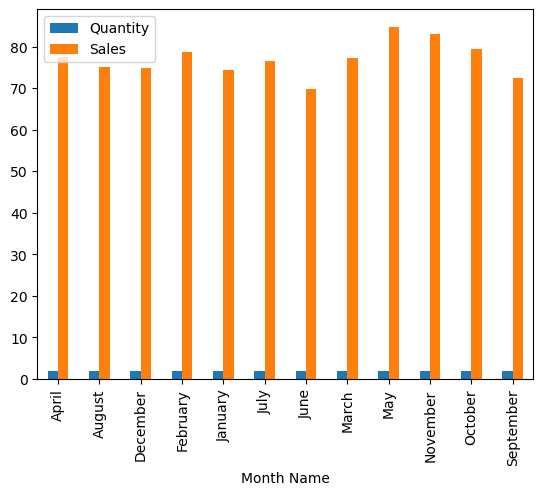

In [84]:
df.groupby("Month Name")[['Quantity','Sales']].mean().plot(kind = "bar")

<AxesSubplot:xlabel='Month Name'>

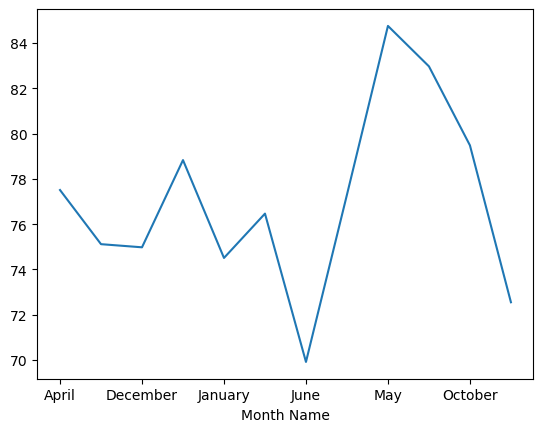

In [86]:
df.groupby("Month Name")['Sales'].mean().plot(kind = "line")

In [87]:
df.groupby("State")['Sales'].sum()

State
Arizona          16000
California       34580
Colorado         15704
Florida          17996
Georgia          18374
Illinois         17730
Louisiana        20215
Massachusetts    18293
Missouri         20946
Nevada           18892
New York         16256
Ohio             18246
Oregon           16183
Pennsylvania     18140
Tennessee        18659
Texas            17005
Virginia         36973
Washington       17374
Name: Sales, dtype: int64

In [88]:
df.groupby("State")['Sales'].sum().sort_values(ascending = False)[:10]

State
Virginia         36973
California       34580
Missouri         20946
Louisiana        20215
Nevada           18892
Tennessee        18659
Georgia          18374
Massachusetts    18293
Ohio             18246
Pennsylvania     18140
Name: Sales, dtype: int64

# Pivot_table

In [89]:
df.columns

Index(['OrderDate', 'Category', 'Product Name', 'State', 'City', 'Price',
       'Quantity', 'Sales', 'Month No', 'Year', 'Month Name', 'Variance'],
      dtype='object')

In [90]:
df.pivot_table(index = 'State', columns = 'Category', values = 'Sales', aggfunc = "sum")

Category,Furnishings,Housekeeping,Maintenance,Office Supplies,Public Areas
State,,,,,
Arizona,6836,2432,1856,1526,3350
California,12692,4307,4861,2538,10182
Colorado,5773,2546,1669,1739,3977
Florida,7831,1730,2302,935,5198
Georgia,5713,2424,2233,1039,6965
Illinois,5989,2627,3201,1136,4777
Louisiana,8473,2410,2797,1541,4994
Massachusetts,7817,2132,2404,1206,4734
Missouri,8700,2818,2266,1081,6081


In [91]:
df.pivot_table(columns = 'Category', values = 'Sales', aggfunc = "sum")

Category,Furnishings,Housekeeping,Maintenance,Office Supplies,Public Areas
Sales,131995,50343,45787,29541,99900


In [92]:
df.pivot_table(index = 'Category', values = 'Sales', aggfunc = "sum")

,Sales
Category,
Furnishings,131995
Housekeeping,50343
Maintenance,45787
Office Supplies,29541
Public Areas,99900


In [93]:
# Subtotals - Row and Column totals
df.pivot_table(index = 'State', columns = 'Category', values = 'Sales', aggfunc = "sum", margins = True)

Category,Furnishings,Housekeeping,Maintenance,Office Supplies,Public Areas,All
State,,,,,,
Arizona,6836,2432,1856,1526,3350,16000
California,12692,4307,4861,2538,10182,34580
Colorado,5773,2546,1669,1739,3977,15704
Florida,7831,1730,2302,935,5198,17996
Georgia,5713,2424,2233,1039,6965,18374
Illinois,5989,2627,3201,1136,4777,17730
Louisiana,8473,2410,2797,1541,4994,20215
Massachusetts,7817,2132,2404,1206,4734,18293
Missouri,8700,2818,2266,1081,6081,20946


In [95]:
# Subtotals - Row and Column totals
df.pivot_table(index = ["Year", 'State'], columns = 'Category',values = 'Sales', aggfunc = "sum", margins = True)

Category              Furnishings  Housekeeping  Maintenance  Office Supplies  \
Year   State                                                                    
2015.0 Arizona               2935           912          631              601   
       California            6224          2312         2472             1172   
       Colorado              3197          1084          993              811   
       Florida               4451           744          521              382   
       Georgia               3264          1134          618              370   
       Illinois              3414           729         1917              515   
       Louisiana             4106          1389         1525              854   
       Massachusetts         4105          1016         1200              754   
       Missouri              4640          1017         1684              428   
       Nevada                1439          1002         1921              668   
       New York              2152          1652          570              741   
       Ohio                  2981          1785          977             1373   
       Oregon                2936           816          835             1165   
       Pennsylvania          3463          1714         1492              555   
       Tennessee             4279           709         1878              969   
       Texas                 3348          1158         1370              650   
       Virginia              8498          2870         2494             1379   
       Washington            3106          1170         1129             1077   
2016.0 Arizona               3901          1520         1225              925   
       California            6468          1995         2389             1366   
       Colorado              2576          1462          676              928   
       Florida               3380           986         1781              553   
       Georgia               2449          1290         1615              669   
       Illinois              2575          1898         1284              621   
       Louisiana             4367          1021         1272              687   
       Massachusetts         3712          1116         1204              452   
       Missouri              4060          1801          582              653   
       Nevada                3124          1643          916              743   
       New York              3036          1619          525              569   
       Ohio                  2356           906          918             1346   
       Oregon                2877          1490         1192              471   
       Pennsylvania          2359          1758          971              750   
       Tennessee             3500          1754          862              575   
       Texas                 2721          1545          967             1232   
       Virginia              6606          2027         1289             1560   
       Washington            2375          1245         1507              977   
All                        130980         50289        45402            29541   

Category              Public Areas     All  
Year   State                                
2015.0 Arizona                1532    6611  
       California             5465   17645  
       Colorado               1629    7714  
       Florida                2918    9016  
       Georgia                3896    9282  
       Illinois               2190    8765  
       Louisiana              3212   11086  
       Massachusetts          2150    9225  
       Missouri               3134   10903  
       Nevada                 3586    8616  
       New York               2170    7285  
       Ohio                   3365   10481  
       Oregon                 2913    8665  
       Pennsylvania           2482    9706  
       Tennessee              1648    9483  
       Texas                  2106    8632  
       Virginia               

# Merge & Joins